# ELU 502 Deep learning -- Lab session 5
Pierre-Henri Conze, François Rousseau, Ronan Fablet - session: 1h20 (17th april)+3h (20th april)

### Objectives: perform classification on Fashion-MNIST dataset using multiple layer perceptrons, convolutional neural networks, data augmentation and transfer learning to obtain the best classification results as possible!

First, download and read the Fashion-MNIST data.

In [33]:
%matplotlib inline
import keras
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Part 1 - Data management and visualization

#### 1) Fashion-MNIST is a dataset consisting of a training set of A examples and a test set of B examples. Each example is a CxC grayscale image, associated with a label from D classes. What are the values for A, B, C and D?

In [34]:
# to do
A=len(x_train)
B=len(x_test)
C=x_train.shape[1]
D=len(set(y_train))

Each training/test sample is assigned to one of the following labels: 
0	T-shirt
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [35]:
num_classes = 10
class_names = ['tshirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'boot']

#### 2) Visualize one example per class among the training dataset:

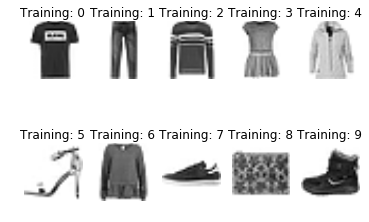

In [36]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
for i in range(num_classes):
    plt.subplot(2, 5, i + 1)
    plt.axis('off')
    index = np.where(y_train == i)[0][0]
    plt.imshow(x_train[index,:,:],cmap=plt.cm.gray_r)
    plt.title('Training: %i' % y_train[index])
plt.show()

### Part 2 - Multi-layer perceptrons

#### 3) Define a simple Keras multi-layer perceptron (MLP) architecture using Sequential API and containing 3 dense layers: 2 dense layers with 512 units and ReLU activation followed by 1 dense layer for softmax regression. Use your model to get first classification results on Fashion MNIST.

In [37]:
num_classes = 10
z_train = keras.utils.to_categorical(y_train, num_classes)
z_test = keras.utils.to_categorical(y_test, num_classes)
x_train1=x_train.reshape(A,C*C)
x_test1=x_test.reshape(B,C*C)

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers.core import Activation

In [108]:
mlp_1 = Sequential()

layers = [Dense(units=512, input_dim=C**2), Activation('relu'),
          Dense(units=512, input_dim=512), Activation('relu'),
          Dense(units=num_classes, input_dim=512), Activation('softmax')]

epochs=10
batch_size=500

for layer in layers :
    mlp_1.add(layer)
    
mlp_1.summary()

rmsprop = keras.optimizers.RMSprop(lr=0.001)

mlp_1.compile(loss='categorical_crossentropy', optimizer=rmsprop,metrics=["accuracy"])
hist_mlp_1 = mlp_1.fit(x_train1, z_train, validation_split=0.2, epochs=epochs, verbose=1,batch_size=batch_size)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_27 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_28 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 10)                5130      
_________________________________________________________________
activation_29 (Activation)   (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Trai

KeyboardInterrupt: 

In [9]:
hist2=mlp_1.evaluate(x=x_test1,y=z_test)


10000/10000 [==============================] - 0s 41us/step


#### 4) Define a generic function evaluate_model() able to:
- plot the evolution of accuracy for both training and testing data with respect to the epochs
- compute final test loss and accuracy. 

Use this function to assess the performance of the previously defined model.

In [40]:
def evaluate_model(model,hist,x,z,epochs):
    #error= [1-x for x in hist.history['acc']]
    #val_error = [1-x for x in hist.history['val_acc']]
    plt.subplot(2, 2, 1)
    plt.plot(hist.history['acc'])
    plt.axis([0, epochs, 0,1 ])
    plt.title('acc')
    plt.subplot(2, 2, 2)
    plt.plot(hist.history['val_acc'])
    plt.axis([0, epochs, 0,1 ])
    plt.title('val_acc')
    """
    plt.subplot(2, 2, 3)
    plt.plot(error)
    plt.axis([0, epochs, 0,1 ])
    plt.title('error')
    
    
    plt.subplot(2, 2, 4)
    plt.plot(val_error)
    plt.axis([0, epochs, 0,1 ])
    plt.title('val_error')
    """
    
    print("final loss & accuracy = ",model.evaluate(x,z,verbose=0))

('final loss & accuracy = ', [2.8854428737640383, 0.82000001802444455])
[0.82060002038876212, 0.82060002038876212, 0.82060002038876212, 0.82060002038876212, 0.82060002038876212, 0.82060002038876212, 0.82060002038876212, 0.82060002038876212, 0.82060002038876212, 0.82060002038876212]


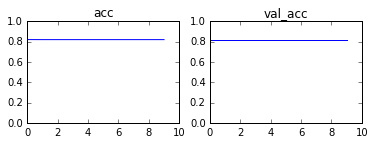

In [41]:
evaluate_model(mlp_1,hist_mlp_1,x_test1,z_test,epochs)
print(hist_mlp_1.history['val_acc'])

#### 5) Define a deeper multi-layer perceptron (MLP) architecture to outperform the previously obtained classification results. 
Use evaluate_model() to provide the evaluation and comment the performance.

In [219]:
mlp_2 = Sequential()

#layers2 = [Dense(units=512, input_dim=C**2), Activation('relu'),
#          Dense(units=num_classes, input_dim=512), Activation('softmax')]

layers2 = [Dense(units=32, input_dim=C**2), Activation('relu'),
        
          Dense(units=num_classes, input_dim=32), Activation('softmax')]

epochs2=10
batch_size2=500

for layer in layers2 :
    mlp_2.add(layer)
    
mlp_2.summary()

rmsprop = keras.optimizers.RMSprop(lr=0.0003)

mlp_2.compile(loss='categorical_crossentropy', optimizer=rmsprop,metrics=["accuracy"])
hist_mlp_2 = mlp_2.fit(x_train1, z_train, validation_split=0.2, epochs=epochs2, verbose=1,batch_size=batch_size2,validation_data=(x_test1,z_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 32)                25120     
_________________________________________________________________
activation_30 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_95 (Dense)             (None, 10)                330       
_________________________________________________________________
activation_31 (Activation)   (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10

60000/60000 [==============================] - 2s 31us/step - loss: 11.1444 - acc: 0.3002 - val_loss: 10.4224 - val_acc: 0.3452
Epoch 2/10

60000/60000 [==============================] - 0s 7us/step - loss: 9

60000/60000 [==============================] - 0s 7us/step - loss: 8.8669 - acc: 0.4448 - val_loss: 8.9064 - val_acc: 0.4424


('final loss & accuracy = ', [8.9064025115966796, 0.44240000000000002])


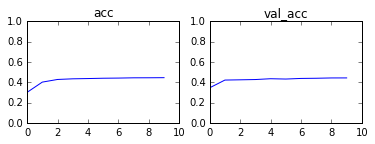

In [220]:
evaluate_model(mlp_2,hist_mlp_2,x_test1,z_test,epochs2)

Conclusion: # todo

### Part 3 - Convolutional neural networks

##### 6) Define a simple Keras convolutional neural network (CNN) architecture using Sequential API and containing the following layers : 1 convolution layer using Conv2D and 32 filters, 1 max-polling layer using MaxPooling2D, 2 dense layers using ReLU and softmax activations respectively. Use this model to get classification results (use evaluate_model() as previously) and compared them to MLP results. 

In [ ]:
# to do

In [51]:
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

print(x_train.shape)
x_train_cnn=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
print(x_train_cnn.shape)
x_test_cnn=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

(60000, 28, 28)
(60000, 28, 28, 1)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)                54090     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                110       
Total params: 54,520
Trainable params: 54,520
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20

60000/60000 [==============================] - 2s 26us/step - loss: 3.5089 -

60000/60000 [==============================] - 1s 19us/step - loss: 2.3026 - acc: 0.0986 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/20

60000/60000 [==============================] - 1s 20us/step - loss: 2.3026 - acc: 0.0969 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/20

60000/60000 [==============================] - 1s 20us/step - loss: 2.3026 - acc: 0.0969 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/20

60000/60000 [==============================] - 1s 20us/step - loss: 2.3026 - acc: 0.0989 - val_loss: 2.3026 - val_acc: 0.0999
Epoch 8/20

60000/60000 [==============================] - 1s 19us/step - loss: 2.3026 - acc: 0.0970 - val_loss: 2.3026 - val_acc: 0.0999
Epoch 9/20

21500/60000 [=========>....................] - ETA: 0s - loss: 2.3026 - acc: 0.0982


60000/60000 [==============================] - 1s 20us/step - loss: 2.3026 - acc: 0.0977 - val_loss: 2.3026 - val_acc: 0.0999
Epoch 10/20

60000/60000 [==============================] - 1s 20us/step - loss: 2.3026 - acc: 0.0986 - val_loss: 2.3026 - val_acc: 0.0999
Epoch 11/20

60000/60000 [==============================] - 1s 19us/step - loss: 2.3026 - acc: 0.0973 - val_loss: 2.3026 - val_acc: 0.0999
Epoch 12/20

60000/60000 [==============================] - 1s 20us/step - loss: 2.3026 - acc: 0.0961 - val_loss: 2.3026 - val_acc: 0.0999
Epoch 13/20

51500/60000 [========================>.....] - ETA: 0s - loss: 2.3026 - acc: 0.0979


60000/60000 [==============================] - 1s 19us/step - loss: 2.3026 - acc: 0.0978 - val_loss: 2.3026 - val_acc: 0.0999
Epoch 14/20

60000/60000 [==============================] - 1s 19us/step - loss: 2.3026 - acc: 0.0978 - val_loss: 2.3026 - val_acc: 0.0999
Epoch 15/20

60000/60000 [==============================] - 1s 19us/step - loss: 2.3026 - acc: 0.0977 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 16/20

60000/60000 [==============================] - 1s 19us/step - loss: 2.3026 - acc: 0.0981 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 17/20

60000/60000 [==============================] - 1s 20us/step - loss: 2.3026 - acc: 0.0994 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 18/20

18500/60000 [========>.....................] - ETA: 0s - loss: 2.3026 - acc: 0.0998


60000/60000 [==============================] - 1s 20us/step - loss: 2.3026 - acc: 0.0971 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 19/20

60000/60000 [==============================] - 1s 20us/step - loss: 2.3026 - acc: 0.0986 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 20/20

60000/60000 [==============================] - 1s 20us/step - loss: 2.3026 - acc: 0.0970 - val_loss: 2.3026 - val_acc: 0.1000
('final loss & accuracy = ', [2.3025793727874757, 0.10000000000000001])


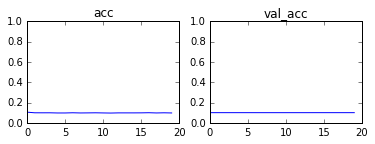

In [52]:
epochs_cnn=20

cnn_1 = Sequential()
input_shape=(x_train_cnn.shape[1],x_train_cnn.shape[2],x_train_cnn.shape[3])
cnn_1.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))

cnn_1.add(MaxPooling2D(pool_size=(2, 2)))
cnn_1.add(Flatten()) #renvoie un vecteur 1,n² à la place d'une matrice n,n

cnn_1.add(Dense(10 ,activation='relu'))
cnn_1.add(Dense(num_classes, activation='softmax'))
cnn_1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy'])
cnn_1.summary()
 
hist_cnn_1 = cnn_1.fit(x_train_cnn, z_train,
          batch_size=batch_size,
          epochs=epochs_cnn,
          verbose=1,
          validation_data=(x_test_cnn, z_test))

evaluate_model(cnn_1,hist_cnn_1,x_test_cnn,z_test,epochs_cnn)

Comments: #todo

#### 7) As for MLP, define a deeper CNN architecture to outperform the previously obtained classification results. What are your conclusions?

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_57 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_46 (Flatten)         (None, 2304)              0         
__________

60000/60000 [==============================] - 7s 108us/step - loss: 6.4991 - acc: 0.5144 - val_loss: 0.5117 - val_acc: 0.8172
Epoch 2/50

60000/60000 [==============================] - 4s 74us/step - loss: 0.4523 - acc: 0.8391 - val_loss: 0.4008 - val_acc: 0.8467
Epoch 3/50

 8500/60000 [===>..........................] - ETA: 3s - loss: 0.3803 - acc: 0.8633


60000/60000 [==============================] - 4s 75us/step - loss: 0.3606 - acc: 0.8692 - val_loss: 0.3502 - val_acc: 0.8713
Epoch 4/50

20000/60000 [=========>....................] - ETA: 2s - loss: 0.3191 - acc: 0.8825


60000/60000 [==============================] - 4s 74us/step - loss: 0.3191 - acc: 0.8824 - val_loss: 0.3207 - val_acc: 0.8827
Epoch 5/50

31000/60000 [==============>...............] - ETA: 2s - loss: 0.2922 - acc: 0.8909


60000/60000 [==============================] - 4s 74us/step - loss: 0.2876 - acc: 0.8931 - val_loss: 0.3036 - val_acc: 0.8910
Epoch 6/50

42250/60000 [====================>.........] - ETA: 1s - loss: 0.2689 - acc: 0.9008


60000/60000 [==============================] - 4s 74us/step - loss: 0.2677 - acc: 0.9012 - val_loss: 0.2878 - val_acc: 0.8966
Epoch 7/50

54000/60000 [==========================>...] - ETA: 0s - loss: 0.2493 - acc: 0.9062


60000/60000 [==============================] - 4s 74us/step - loss: 0.2499 - acc: 0.9058 - val_loss: 0.2787 - val_acc: 0.8991
Epoch 8/50

60000/60000 [==============================] - 4s 74us/step - loss: 0.2355 - acc: 0.9127 - val_loss: 0.2735 - val_acc: 0.9008
Epoch 9/50

 5500/60000 [=>............................] - ETA: 3s - loss: 0.2108 - acc: 0.9255


60000/60000 [==============================] - 4s 74us/step - loss: 0.2226 - acc: 0.9167 - val_loss: 0.2633 - val_acc: 0.9041
Epoch 10/50

18500/60000 [========>.....................] - ETA: 2s - loss: 0.2012 - acc: 0.9238


60000/60000 [==============================] - 4s 73us/step - loss: 0.2095 - acc: 0.9209 - val_loss: 0.2600 - val_acc: 0.9078
Epoch 11/50

30500/60000 [==============>...............] - ETA: 2s - loss: 0.1979 - acc: 0.9247


60000/60000 [==============================] - 4s 74us/step - loss: 0.1990 - acc: 0.9242 - val_loss: 0.2636 - val_acc: 0.9038
Epoch 12/50

42250/60000 [====================>.........] - ETA: 1s - loss: 0.1934 - acc: 0.9267


60000/60000 [==============================] - 4s 74us/step - loss: 0.1935 - acc: 0.9272 - val_loss: 0.2596 - val_acc: 0.9070
Epoch 13/50

56250/60000 [===========================>..] - ETA: 0s - loss: 0.1823 - acc: 0.9306


60000/60000 [==============================] - 4s 74us/step - loss: 0.1826 - acc: 0.9304 - val_loss: 0.2550 - val_acc: 0.9114
Epoch 14/50

60000/60000 [==============================] - 4s 74us/step - loss: 0.1755 - acc: 0.9343 - val_loss: 0.2504 - val_acc: 0.9130
Epoch 15/50

 7750/60000 [==>...........................] - ETA: 3s - loss: 0.1603 - acc: 0.9378


60000/60000 [==============================] - 4s 74us/step - loss: 0.1681 - acc: 0.9369 - val_loss: 0.2496 - val_acc: 0.9119
Epoch 16/50

19000/60000 [========>.....................] - ETA: 2s - loss: 0.1523 - acc: 0.9410


60000/60000 [==============================] - 4s 75us/step - loss: 0.1593 - acc: 0.9389 - val_loss: 0.2610 - val_acc: 0.9095
Epoch 17/50

31250/60000 [==============>...............] - ETA: 2s - loss: 0.1549 - acc: 0.9399


60000/60000 [==============================] - 4s 74us/step - loss: 0.1551 - acc: 0.9402 - val_loss: 0.2527 - val_acc: 0.9144
Epoch 18/50

42500/60000 [====================>.........] - ETA: 1s - loss: 0.1467 - acc: 0.9442


60000/60000 [==============================] - 4s 74us/step - loss: 0.1477 - acc: 0.9439 - val_loss: 0.2555 - val_acc: 0.9117
Epoch 19/50

53500/60000 [=========================>....] - ETA: 0s - loss: 0.1434 - acc: 0.9455


60000/60000 [==============================] - 4s 75us/step - loss: 0.1431 - acc: 0.9455 - val_loss: 0.2503 - val_acc: 0.9162
Epoch 20/50

60000/60000 [==============================] - 4s 74us/step - loss: 0.1401 - acc: 0.9469 - val_loss: 0.2486 - val_acc: 0.9158
Epoch 21/50

 4750/60000 [=>............................] - ETA: 3s - loss: 0.1379 - acc: 0.9474


60000/60000 [==============================] - 4s 74us/step - loss: 0.1327 - acc: 0.9502 - val_loss: 0.2559 - val_acc: 0.9163
Epoch 22/50

17750/60000 [=======>......................] - ETA: 2s - loss: 0.1227 - acc: 0.9524


60000/60000 [==============================] - 4s 74us/step - loss: 0.1292 - acc: 0.9515 - val_loss: 0.2563 - val_acc: 0.9156
Epoch 23/50

28750/60000 [=============>................] - ETA: 2s - loss: 0.1217 - acc: 0.9540


60000/60000 [==============================] - 4s 74us/step - loss: 0.1213 - acc: 0.9538 - val_loss: 0.2497 - val_acc: 0.9173
Epoch 24/50

40250/60000 [===================>..........] - ETA: 1s - loss: 0.1151 - acc: 0.9560


60000/60000 [==============================] - 4s 74us/step - loss: 0.1172 - acc: 0.9553 - val_loss: 0.2486 - val_acc: 0.9169
Epoch 25/50

51500/60000 [========================>.....] - ETA: 0s - loss: 0.1142 - acc: 0.9568


60000/60000 [==============================] - 4s 75us/step - loss: 0.1143 - acc: 0.9565 - val_loss: 0.2611 - val_acc: 0.9158
Epoch 26/50

60000/60000 [==============================] - 5s 75us/step - loss: 0.1103 - acc: 0.9580 - val_loss: 0.2588 - val_acc: 0.9188
Epoch 27/50

 1750/60000 [..............................] - ETA: 4s - loss: 0.1069 - acc: 0.9571


60000/60000 [==============================] - 4s 74us/step - loss: 0.1050 - acc: 0.9594 - val_loss: 0.2670 - val_acc: 0.9169
Epoch 28/50

13750/60000 [=====>........................] - ETA: 3s - loss: 0.1037 - acc: 0.9597


60000/60000 [==============================] - 4s 74us/step - loss: 0.1046 - acc: 0.9601 - val_loss: 0.2653 - val_acc: 0.9170
Epoch 29/50

26500/60000 [============>.................] - ETA: 2s - loss: 0.0973 - acc: 0.9633


60000/60000 [==============================] - 5s 75us/step - loss: 0.1008 - acc: 0.9615 - val_loss: 0.2665 - val_acc: 0.9123
Epoch 30/50

38500/60000 [==================>...........] - ETA: 1s - loss: 0.0976 - acc: 0.9634


60000/60000 [==============================] - 4s 75us/step - loss: 0.1001 - acc: 0.9619 - val_loss: 0.2581 - val_acc: 0.9183
Epoch 31/50

50000/60000 [========================>.....] - ETA: 0s - loss: 0.0920 - acc: 0.9648


60000/60000 [==============================] - 5s 75us/step - loss: 0.0929 - acc: 0.9647 - val_loss: 0.2774 - val_acc: 0.9166
Epoch 32/50

60000/60000 [==============================] - 5s 75us/step - loss: 0.0936 - acc: 0.9645 - val_loss: 0.2765 - val_acc: 0.9194
Epoch 33/50

 1000/60000 [..............................] - ETA: 4s - loss: 0.0858 - acc: 0.9650


60000/60000 [==============================] - 5s 75us/step - loss: 0.0894 - acc: 0.9654 - val_loss: 0.2678 - val_acc: 0.9220
Epoch 34/50

12250/60000 [=====>........................] - ETA: 3s - loss: 0.0806 - acc: 0.9689


60000/60000 [==============================] - 5s 75us/step - loss: 0.0899 - acc: 0.9663 - val_loss: 0.2719 - val_acc: 0.9186
Epoch 35/50

23500/60000 [==========>...................] - ETA: 2s - loss: 0.0831 - acc: 0.9699


60000/60000 [==============================] - 5s 76us/step - loss: 0.0858 - acc: 0.9672 - val_loss: 0.2707 - val_acc: 0.9162
Epoch 36/50

35750/60000 [================>.............] - ETA: 1s - loss: 0.0816 - acc: 0.9683


60000/60000 [==============================] - 4s 75us/step - loss: 0.0820 - acc: 0.9688 - val_loss: 0.2957 - val_acc: 0.9131
Epoch 37/50

47500/60000 [======================>.......] - ETA: 0s - loss: 0.0801 - acc: 0.9699


60000/60000 [==============================] - 4s 75us/step - loss: 0.0807 - acc: 0.9698 - val_loss: 0.2841 - val_acc: 0.9184
Epoch 38/50

60000/60000 [==============================] - 5s 75us/step - loss: 0.0776 - acc: 0.9710 - val_loss: 0.2799 - val_acc: 0.9201


Epoch 39/50

60000/60000 [==============================] - 4s 75us/step - loss: 0.0745 - acc: 0.9718 - val_loss: 0.2974 - val_acc: 0.9178
Epoch 40/50

11500/60000 [====>.........................] - ETA: 3s - loss: 0.0744 - acc: 0.9715


60000/60000 [==============================] - 4s 75us/step - loss: 0.0748 - acc: 0.9714 - val_loss: 0.2894 - val_acc: 0.9188
Epoch 41/50

22750/60000 [==========>...................] - ETA: 2s - loss: 0.0721 - acc: 0.9734


60000/60000 [==============================] - 4s 75us/step - loss: 0.0730 - acc: 0.9723 - val_loss: 0.3008 - val_acc: 0.9187
Epoch 42/50

34000/60000 [================>.............] - ETA: 1s - loss: 0.0699 - acc: 0.9743


60000/60000 [==============================] - 4s 75us/step - loss: 0.0697 - acc: 0.9741 - val_loss: 0.2968 - val_acc: 0.9212
Epoch 43/50

46000/60000 [======================>.......] - ETA: 0s - loss: 0.0666 - acc: 0.9749


60000/60000 [==============================] - 5s 75us/step - loss: 0.0680 - acc: 0.9745 - val_loss: 0.2925 - val_acc: 0.9203
Epoch 44/50

57750/60000 [===========================>..] - ETA: 0s - loss: 0.0675 - acc: 0.9749


60000/60000 [==============================] - 5s 75us/step - loss: 0.0675 - acc: 0.9750 - val_loss: 0.3016 - val_acc: 0.9182
Epoch 45/50

60000/60000 [==============================] - 4s 75us/step - loss: 0.0660 - acc: 0.9755 - val_loss: 0.2994 - val_acc: 0.9195
Epoch 46/50

 9250/60000 [===>..........................] - ETA: 3s - loss: 0.0588 - acc: 0.9792


60000/60000 [==============================] - 4s 75us/step - loss: 0.0640 - acc: 0.9764 - val_loss: 0.3039 - val_acc: 0.9203
Epoch 47/50

21250/60000 [=========>....................] - ETA: 2s - loss: 0.0588 - acc: 0.9774


60000/60000 [==============================] - 5s 76us/step - loss: 0.0608 - acc: 0.9772 - val_loss: 0.3086 - val_acc: 0.9195
Epoch 48/50

33000/60000 [===============>..............] - ETA: 1s - loss: 0.0620 - acc: 0.9763


60000/60000 [==============================] - 5s 75us/step - loss: 0.0611 - acc: 0.9767 - val_loss: 0.3116 - val_acc: 0.9201
Epoch 49/50

44500/60000 [=====================>........] - ETA: 1s - loss: 0.0612 - acc: 0.9768


60000/60000 [==============================] - 5s 75us/step - loss: 0.0609 - acc: 0.9771 - val_loss: 0.3045 - val_acc: 0.9237
Epoch 50/50

55750/60000 [==========================>...] - ETA: 0s - loss: 0.0582 - acc: 0.9783


60000/60000 [==============================] - 5s 75us/step - loss: 0.0587 - acc: 0.9781 - val_loss: 0.3403 - val_acc: 0.9210
('final loss & accuracy = ', [0.34030563266947866, 0.92100000000000004])


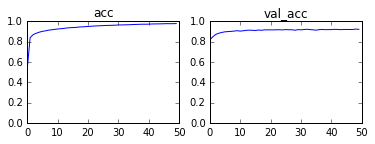

In [237]:
epochs_cnn=50

cnn_2 = Sequential()
input_shape=(x_train_cnn.shape[1],x_train_cnn.shape[2],x_train_cnn.shape[3])





batch_size=250


cnn_2.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape, padding='same'))
cnn_2.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape))

cnn_2.add(MaxPooling2D(pool_size=(2, 2)))
cnn_2.add(Dropout(0.25))


cnn_2.add(MaxPooling2D(pool_size=(2, 2)))
cnn_2.add(Dropout(0.1))

cnn_2.add(Flatten()) #renvoie un vecteur 1,n² à la place d'une matrice n,n

cnn_2.add(Dense(128, activation='relu'))
cnn_2.add(Dense(num_classes, activation='softmax'))


cnn_2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


cnn_2.summary()





 
hist_cnn_2 = cnn_2.fit(x_train_cnn, z_train,
          batch_size=batch_size,
          epochs=epochs_cnn,
          verbose=1,
          validation_data=(x_test_cnn, z_test))

evaluate_model(cnn_2,hist_cnn_2,x_test_cnn,z_test,epochs_cnn)

('final loss & accuracy = ', [0.34030563266947866, 0.92100000000000004])


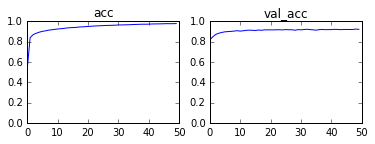

In [238]:
evaluate_model(cnn_2,hist_cnn_2,x_test_cnn,z_test,epochs_cnn)

Comments: #todo

### Part 4 - Visualize wrongly predictions

#### 8) Create a function visualize_wrongly_predictions() able to show wrong prediction for each class for a given model as input. Use this function for each of the 4 previouly trained models (2 MLP, 2 CNN).

In [98]:
y_pred=cnn_2.predict(x_test_cnn)
y_pred=np.argmax(y_pred,axis=1)
print(y_pred)
print(y_test)
print(type(y_test[0]))
print(type(y_pred[0]))
print(y_test[0]!=y_pred[0])

[9 2 1 ..., 8 1 5]
[9 2 1 ..., 8 1 5]
<type 'numpy.uint8'>
<type 'numpy.int64'>
False


In [197]:
import matplotlib.pyplot as plt
import numpy as np
def visualize_wrongly_predictions(model,x_test_reshape, x_test,y_test):
    y_pred=model.predict(x_test_reshape)
    y_pred=np.argmax(y_pred,axis=1)
    
    y_class_already=[]
    
    plt.figure(figsize=(20,10))


    index=[]
    j=0
    while(len(index) < 10):
        if (y_test[j]!=y_pred[j] and y_test[j] not in y_class_already):
            index.append(j)
            j+=1
            y_class_already.append(y_test[j])
        else: j+=1

    k=0
    for i in index :
        plt.subplot(10, 1, k + 1)
        k+=1
        plt.axis('off')

        plt.imshow(x_test[i,:,:], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('True value '+str(y_test[i])+' Wrong value :'+str(y_pred[i]))
    plt.show()


    
    
    

(10000, 28, 28)


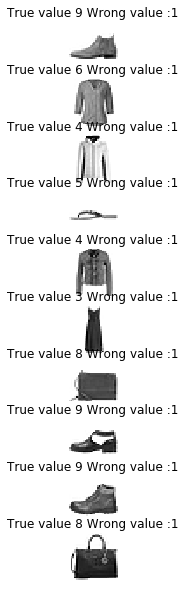

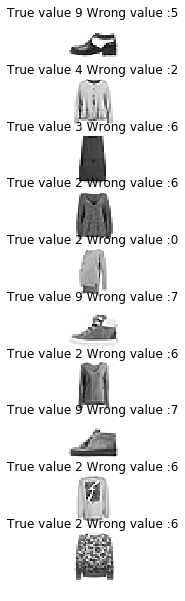

In [199]:
print(x_test.shape)

visualize_wrongly_predictions(cnn_1,x_test_cnn,x_test,y_test)
visualize_wrongly_predictions(cnn_2,x_test_cnn,x_test,y_test)

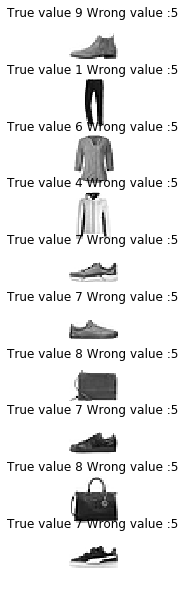

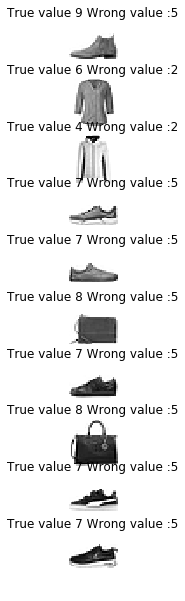

In [200]:
visualize_wrongly_predictions(mlp_1,x_test1,x_test,y_test)
visualize_wrongly_predictions(mlp_2,x_test1,x_test,y_test)

Comments: #todo

#### 9) Using the code given below, create a function visualize_confusion_matrix() able to display the confusion matrix  for a given model as input. Use this function for each of the 4 previouly trained models (2 MLP, 2 CNN). What is the most common confusion?

In [106]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [165]:
def visualize_confusion_matrix(model,x_test,y_test,y_pred):
    mat=np.empty((10,10))
    
    for i in range(0,10):
        for j in range (0,10):
            
            count=0
            for k in range(0,y_test.shape[0]):
                if (y_test[k]==i and y_pred[k]==j):
                    count+=1
            mat[i][j]=int(count)
            
    plot_confusion_matrix(mat, ['tshirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'boot'],
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
    
    
    
    
    
    


Normalized confusion matrix


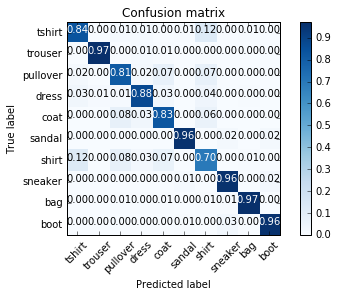

In [166]:
visualize_confusion_matrix(cnn_1,x_test_cnn,y_test,y_pred)

In [ ]:
# visualize_confusion_matrix(cnn_1, ...)
# visualize_confusion_matrix(cnn_2, ...)

Most common confusion: #todo

Conclusion:

### Part 5 - Data augmentation

#### 10) Based on the documentation (https://keras.io/preprocessing/image/), train one of your CNN architecture using data augmentation and conclude on the used of augmented data.

In [234]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.08,
    height_shift_range=0.08,
    shear_range=0.3, 
    zoom_range=0.08)


datagen.fit(x_train_cnn)
cnn_2.fit_generator(datagen.flow(x_train_cnn, z_train, batch_size=32),
                    steps_per_epoch=len(x_train_cnn) / 32, epochs=10)
# to do

Epoch 1/10

 950/1875 [==============>...............] - ETA: 5s - loss: 0.5374 - acc: 0.8046


1875/1875 [==============================] - 10s 5ms/step - loss: 0.4989 - acc: 0.8159
Epoch 2/10

  41/1875 [..............................] - ETA: 19s - loss: 0.4315 - acc: 0.8316


 979/1875 [==============>...............] - ETA: 5s - loss: 0.4312 - acc: 0.8406


1875/1875 [==============================] - 10s 6ms/step - loss: 0.4263 - acc: 0.8416
Epoch 3/10

  53/1875 [..............................] - ETA: 18s - loss: 0.3905 - acc: 0.8626


1063/1875 [================>.............] - ETA: 4s - loss: 0.4039 - acc: 0.8500


1875/1875 [==============================] - 10s 5ms/step - loss: 0.4030 - acc: 0.8498
Epoch 4/10

 162/1875 [=>............................] - ETA: 11s - loss: 0.4035 - acc: 0.8509


1166/1875 [=================>............] - ETA: 3s - loss: 0.4016 - acc: 0.8522


1875/1875 [==============================] - 10s 5ms/step - loss: 0.3984 - acc: 0.8536
Epoch 5/10

 259/1875 [===>..........................] - ETA: 9s - loss: 0.3777 - acc: 0.8575


1257/1875 [===================>..........] - ETA: 3s - loss: 0.3826 - acc: 0.8583


1875/1875 [==============================] - 10s 5ms/step - loss: 0.3816 - acc: 0.8581
Epoch 6/10

 334/1875 [====>.........................] - ETA: 9s - loss: 0.3738 - acc: 0.8641


1317/1875 [====================>.........] - ETA: 3s - loss: 0.3776 - acc: 0.8643


1875/1875 [==============================] - 10s 5ms/step - loss: 0.3789 - acc: 0.8625
Epoch 7/10

 412/1875 [=====>........................] - ETA: 8s - loss: 0.3705 - acc: 0.8646


1402/1875 [=====================>........] - ETA: 2s - loss: 0.3738 - acc: 0.8626


1875/1875 [==============================] - 10s 5ms/step - loss: 0.3751 - acc: 0.8618
Epoch 8/10

 500/1875 [=======>......................] - ETA: 7s - loss: 0.3738 - acc: 0.8668


1519/1875 [=======================>......] - ETA: 1s - loss: 0.3722 - acc: 0.8642


1875/1875 [==============================] - 10s 5ms/step - loss: 0.3710 - acc: 0.8652
Epoch 9/10

 628/1875 [=========>....................] - ETA: 6s - loss: 0.3725 - acc: 0.8654


1614/1875 [========================>.....] - ETA: 1s - loss: 0.3631 - acc: 0.8679


1875/1875 [==============================] - 10s 5ms/step - loss: 0.3659 - acc: 0.8669
Epoch 10/10

 722/1875 [==========>...................] - ETA: 6s - loss: 0.3667 - acc: 0.8678


1733/1875 [==========================>...] - ETA: 0s - loss: 0.3708 - acc: 0.8670


1875/1875 [==============================] - 10s 5ms/step - loss: 0.3709 - acc: 0.8665


In [ ]:
evaluate_model(cnn_2,hist_cnn_2,x_test1,z_test,epochs2)

Comments: #todo

### Part 6 - Transfer learning from VGG16 trained on ImageNet

Transfer learning, is a research problem in machine learning that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem.

In this part, you will do fine tuning on a pre-trained network. Fine-tuning consists in starting from a trained network, then re-training it on a new dataset using very small weight updates. To do so, you need to load a pre-trained model, add a dense classifier to compute the output, and then to freeze the weights of the pre-trained model (https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html).   

#### 11) Exploit an architecture already trained on ImageNet (https://keras.io/applications) to improve the classification results on Fashion-MNIST.

In [ ]:
from keras import applications
from skimage.transform import resize

# to do

In [ ]:
# to do

Conclusion: #todo

#### 12) Challenge: the first 3 teams in terms of overall test accuracy results (whatever the methodology used) will obtain bonus points!

Best accuracy reached: #todo

Conclusions: #todo